<a href="https://colab.research.google.com/github/devkegovind/Data-Analytics-Laboratory/blob/main/To_Determine_Mechanical_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b>TO DETERMINE MECHANICAL PROPERTIES FROM STRESS STRAIN CURVE DATA</b></h1>

<h4 align='justify'><b>Aim: To determine mechanical properties from stress strain curve data.</b></h4>
<h4 align='justify'><b>Prerequisites: Tensile Test data, Jupyter Notebook / Google Colab</b></h4>
<h4 align='justify'><b>Theory:</b></h4>
<h4 align='justify'><b>Tensile Test:</b></h4>
<h4 align='justify'>A tensile test is a type of mechanical test performed by engineers used to determine the mechanical properties of a material. Engineering metal alloys such as steel and aluminium alloys are tensile tested in order to determine their strength and stiffness. Tensile tests are performed in a piece of equipment called a mechanical test frame.
 

Fig: Tensile Test Set up for Data Acquisition 

<h4 align='justify'>After a tensile test is complete, a set of data is produced by the mechanical test frame. Using the data acquired during a tensile test, a stress-strain curve can be produced.
In this post, we will create a stress-strain curve (a plot) from a set of tensile test data of a steel 1045 sample and an aluminium 6061 sample. The stress strain curve we construct will have the following features:</h4>

- A descriptive title
- Axes labels with units
- Two lines on the same plot. One line for steel 1045 and one line for aluminum 6061
- A legend

<h4 align='justify'></b>Procedure:</b></h4>

1.	Install Python:We are going to build our stress strain curve with Python and a Jupyter notebook. I suggest engineers and problem-solvers download and install the Anaconda distribution of Python. See this post to learn how to install Anaconda on your computer. Alternatively, you can download Python form Python.org or download Python the Microsoft Store.
2.	Open a Jupyter notebook
We will construct our stress strain curve using a Jupyter notebook. See this post to see how to open a Jupyter notebook.
Make sure to save your Jupyter notebook with a recognizable name.
3.	Download the data and move the data into the same folder as the Jupyter notebook
 Next, we need to download the two data files that we will use to build our stress-strain curve. You can download sample data using the links below:
steel1045.xls
aluminum6061.xls
After these .xls files are downloaded, both .xls files need to be moved into the same folder as our Jupyter notebook.

4.	Install Jupyter, NumPy, Pandas, and Matplotlib Once Python is installed, the next thing we need to do is install a couple of Python packages. If you are using the Anaconda distribution of Python, the packages we are going to use to build the plot: Jupyter, NumPy, Pandas, and Matplotlib come pre-installed and no additional installation steps are necessary.
5.	Import NumPy, Pandas, and Matplotlib
Now that our Jupyter notebook is open and the two .xls data files are in the same folder as the Jupyter notebook, we can start coding and build our plot.
At the top of the Jupyter notebook, import NumPy, Pandas and Matplotlib. The command %matplotlib inline is included so that our plot will display directly inside our Jupyter notebook. If you are using a .py file instead of a Jupyter notebook, make sure to comment out %matplotlib inline as this line is not valid Python code.
We will also print out the versions of our NumPy and Pandas packages using the .__version__ attribute. If the versions of NumPy and Pandas prints out, that means that NumPy and Pandas are installed and we can use these packages in our code.

6.	Ensure the two .xls data files are in the same folder as the Jupyter notebook
7.	Before we proceed, let's make sure the two .xls data files are in the same folder as our running Jupyter notebook. We'll use a Jupyter notebook magic command to print out the contents of the folder that our notebook is in. The %ls command lists the contents of the current folder.
8.	Create stress and strain series from the FORCE, EXT, and CH5 columns
- FORCE Force measurements from the load cell in pounds (lb), force in pounds
- EXT Extension measurements from the mechanical extensometer in percent (%), strain in percent
- CH5 Extension readings from the laser extensometer in percent (%), strain in percent

Next we'll create a four Pandas series from the ['CH5'] and ['FORCE'] columns of our al_df and steel_df dataframes. The equations below show how to calculate stress, σ and strain, ϵ, from force F and cross-sectional area A. Cross-sectional area A is the formula for the area of a circle. For the steel and aluminium samples we tested, the diameter d was 0.506 in.

 

<h4><b>Calculate ductility</b></h4>
<h4 align='justify'>The ductility of a metal is calculated from a stress strain curve by drawing a line down from the fracture point on the curve, parallel to the linear elastic region. Where that line crosses the strain axis is the ductility.
Point-Slope Formula for a line:</h4>
$y-y1=m(x−x1)$

Where m= slope in the linear elastic region (elastic modulus), 

$x1$ = last strain point on the stress strain curve,

$y1$ = last stress point on the stress strain curve.

Solve the equation above for x, when y=0  in terms of x1, x2  and m 
$x= ( − y1/  m)+ x1$

Substitute in ductility, elastic modulus EE, and the last stress and strain points.

$percen. EL$= $(−stresslast / E)$ + $strainlast$

Results :
Sr. No	Mechanical property	Mechanical property from Program
		Steal1045	Aluminium6061

1	Tensile Strength		
2	Elastic Modulus		
3	Ductility		

<h4 align='justify'><b>Conclusion:</b></h4>
<h4 align='justify'>In this practical, we built a stress strain curve using Python. With the help of python libraries like Numpy, Panda, Matplotlib, scipy we have calculated the mechanical properties of metals steal1045 and aluminium6061 from tensile test data.</h4>


<h4><b>Importing Library</b></h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4><b>Importing Dataset</b></h4>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_al = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/DAL/aluminum6061.xls')
df_al

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195,761,196,146.741,0.66782,8182.946777,3.007105,17.382132,NaN,NaN,NaN
196,761,197,146.938,0.67016,8123.916016,3.007105,17.502197,NaN,NaN,NaN
197,761,198,147.141,0.67172,8074.892090,3.007105,17.502197,NaN,NaN,NaN
198,761,199,147.339,0.67326,8019.407227,3.007105,17.622837,NaN,NaN,NaN


In [4]:
df_steel = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/DAL/steel1045.xls')
df_steel

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
210,762,211,160.565,0.73436,20862.660156,3.013513,17.186405,NaN,NaN,NaN
211,762,212,160.964,0.73750,20716.890625,3.013513,17.300003,NaN,NaN,NaN
212,762,213,161.369,0.74056,20557.337891,3.013513,17.546461,NaN,NaN,NaN
213,762,214,161.657,0.74288,20433.939453,3.013513,17.671289,NaN,NaN,NaN


In [5]:
df_steel.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN


In [6]:
df_al.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


In [7]:
d = 0.506

In [8]:
r = d/2

In [9]:
r

0.253

In [10]:
A = np.pi*r**2
A

0.20109020416362905

In [11]:
stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = (df_steel['CH5']*0.01)

In [12]:
stress_al = (df_al['FORCE']/A)*0.001
strain_al = (df_al['CH5']*0.01)

<h4><b>Plot the Full Stress Strain Curve</b></h4>

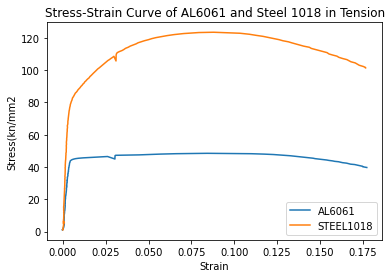

In [13]:
fig, ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)
ax.set_xlabel('Strain')
ax.set_ylabel('Stress(kn/mm2')
ax.set_title('Stress-Strain Curve of AL6061 and Steel 1018 in Tension')
ax.legend(['AL6061', 'STEEL1018'])
plt.show()

<h4><b>Calculate Tensile Strenght</b></h4>

In [14]:
ts_al = np.max(stress_al)
final_ts_al = 6.8976 * ts_al
print(f"The Tensile Strenght of Aluminium in Kn/mm2 :{round(final_ts_al, 2)} Kn/mm2")

The Tensile Strenght of Aluminium in Kn/mm2 :334.27 Kn/mm2


In [15]:
ts_steel = np.max(stress_steel)
final_ts_steel = 6.8976 * ts_steel
print(f"The Tensile Strenght of Steel in Kn/mm2 :{round(final_ts_steel, 2)} Kn/mm2")

The Tensile Strenght of Steel in Kn/mm2 :851.67 Kn/mm2


<h4><b>Calculate Elastic Modulus</b></h4>

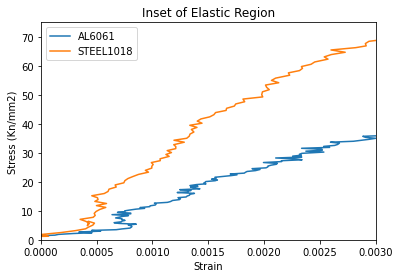

In [16]:
fig, ax = plt.subplots()
ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)

ax.set_title("Inset of Elastic Region")
ax.set_xlabel("Strain")
ax.set_ylabel("Stress (Kn/mm2)")
ax.legend(['AL6061', 'STEEL1018'])
ax.set_xlim([0, 0.003])
ax.set_ylim([0, 75])
plt.show()

<h4><b>Calculate Elastic Modulus of AL6061</b></h4>

In [17]:
# use stress and strain values from stress = 0 to 35 N/mm2.
linear_stress_al_mask = stress_al < 35
linear_stress_al = stress_al[linear_stress_al_mask]
linear_strain_al = strain_al[linear_stress_al_mask]

In [18]:
linear_stress_al

0       1.000340
1       1.024307
2       1.090533
3       1.335251
4       1.601412
         ...    
112    33.324281
113    33.668938
114    33.987126
115    34.332404
116    34.663815
Name: FORCE, Length: 117, dtype: float64

In [19]:
linear_strain_al

0     -0.000231
1     -0.000130
2     -0.000249
3     -0.000068
4      0.000126
         ...   
112    0.002675
113    0.002595
114    0.002801
115    0.002875
116    0.002943
Name: CH5, Length: 117, dtype: float64

In [21]:
from scipy.stats import linregress

linear_regression_output = linregress(linear_strain_al, linear_stress_al)
E_al = linear_regression_output[0]
final_E_al = 6.8976 * E_al
print(f"The Elastic Modulus of AL6061 is {round(final_E_al, 2)} Kn/mm2")

The Elastic Modulus of AL6061 is 89631.51 Kn/mm2


<h4><b>Calculate Elastic Modulus of STEEL1018</b></h4>

In [22]:
# use stress and strain values from stress = 0 to 55 N/mm2
linear_stress_steel_mask = stress_steel < 55
linear_stress_steel = stress_steel[linear_stress_steel_mask]
linear_strain_steel = strain_steel[linear_stress_steel_mask]

linear_regression_output_steel = linregress(linear_strain_steel, linear_stress_steel)
E_steel = linear_regression_output_steel[0]
final_E_steel = 6.8976 * E_steel
print(f"The Elastic Modulus of Steel1018 is {round(final_E_steel, 2)} Kn/mm2.")

The Elastic Modulus of Steel1018 is 192235.18 Kn/mm2.


<h4><b>Calculate Ductility</b></h4>

In [24]:
# Find the Ductility of AL6061
stress_al_array = np.array(stress_al)
stress_al_last = stress_al_array[-1]
strain_al_array = np.array(strain_al)
strain_al_last = strain_al_array[-1]
EL_al = -stress_al_last/final_E_al + strain_al_last
print(f"The Ductility of AL6061 is {round(EL_al*100,2)}%")

The Ductility of AL6061 is 17.7%


In [25]:
# Find the Ductility of Steel1018
stress_steel_array = np.array(stress_steel)
stress_steel_last = stress_steel_array[-1]
strain_steel_array = np.array(strain_steel)
strain_steel_last = strain_steel_array[-1]
EL_steel = -stress_steel_last/final_E_steel + strain_steel_last
print(f"The Ductility of STEEL1018 is {round(EL_steel*100,2)}%")

The Ductility of STEEL1018 is 17.62%
